In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [31]:
# Load data from CSV file
data = pd.read_csv('SeismicData_Mag.csv')

In [32]:
data.columns

Index(['Latitude', 'Longitude', 'Depth', 'Time', 'OriginID', 'EventID',
       'JulianDate', 'Ndef', 'Grn', 'Srn', 'Mb', 'Ml', 'EvtType'],
      dtype='object')

In [33]:
df = data.copy()
df['EvtType'] = df['EvtType'].map({'-':0, 'ec':0, 'en':1,'ex':0, 'mc':0,'qd':0,'qf':0,'qt':0})

In [34]:
df.head()

,Latitude,Longitude,Depth,Time,OriginID,EventID,JulianDate,Ndef,Grn,Srn,Mb,Ml,EvtType
0,37.021,-115.988,0.00,717260640.0,675330,653332,1992267,41,41,3,4.4,4.3,0
1,37.021,-115.989,0.34,717260640.0,3963015,653332,1992267,-1,41,3,-999.0,-999.0,1
2,37.021,-115.988,0.00,717260640.0,5031582,653332,1992267,41,41,3,-999.0,4.4,0
3,37.021,-115.988,0.00,717260640.0,6192665,653332,1992267,-1,41,3,4.4,-999.0,1
4,37.207,-116.210,0.00,716835600.0,675113,653134,1992262,43,41,3,4.4,-999.0,0


In [35]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(a):
    le = LabelEncoder()
    df[a] = le.fit_transform(df[a])

df.columns

label_list = ['Latitude', 'Longitude', 'Depth', 'Time','OriginID','EventID', 'JulianDate', 'Ndef', 'Grn','Srn', 'Mb', 'Ml']
for i in label_list:
    label_encoder(i)

df.head()

,Latitude,Longitude,Depth,Time,OriginID,EventID,JulianDate,Ndef,Grn,Srn,Mb,Ml,EvtType
0,149,264,1,165,77,77,78,35,2,0,19,70,0
1,149,263,23,165,227,77,78,0,2,0,0,0,1
2,149,264,1,165,379,77,78,35,2,0,0,75,0
3,149,264,1,165,496,77,78,0,2,0,19,0,1
4,228,177,1,163,76,76,77,37,2,0,19,0,0


In [36]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(df)
df.head()

,Latitude,Longitude,Depth,Time,OriginID,EventID,JulianDate,Ndef,Grn,Srn,Mb,Ml,EvtType
0,149,264,1,165,77,77,78,35,2,0,19,70,0
1,149,263,23,165,227,77,78,0,2,0,0,0,1
2,149,264,1,165,379,77,78,35,2,0,0,75,0
3,149,264,1,165,496,77,78,0,2,0,19,0,1
4,228,177,1,163,76,76,77,37,2,0,19,0,0


In [37]:
scaled_features = scaler.transform(df)

In [38]:
columns = ['Latitude', 'Longitude', 'Depth', 'Time', 'OriginID', 'EventID',
       'JulianDate', 'Ndef', 'Grn', 'Srn', 'Mb', 'Ml','EvtType']

df_scaled = pd.DataFrame(scaled_features,columns=columns)
df_scaled.head()

,Latitude,Longitude,Depth,Time,OriginID,EventID,JulianDate,Ndef,Grn,Srn,Mb,Ml,EvtType
0,0.476038,0.758621,0.004854,0.466102,0.122029,0.506579,0.557143,0.253623,0.285714,0.0,0.487179,0.619469,0.0
1,0.476038,0.755747,0.111650,0.466102,0.359746,0.506579,0.557143,0.000000,0.285714,0.0,0.000000,0.000000,1.0
2,0.476038,0.758621,0.004854,0.466102,0.600634,0.506579,0.557143,0.253623,0.285714,0.0,0.000000,0.663717,0.0
3,0.476038,0.758621,0.004854,0.466102,0.786054,0.506579,0.557143,0.000000,0.285714,0.0,0.487179,0.000000,1.0
4,0.728435,0.508621,0.004854,0.460452,0.120444,0.500000,0.550000,0.268116,0.285714,0.0,0.487179,0.000000,0.0


In [39]:
#features = df[['Latitude', 'Longitude', 'Depth', 'Time', 'OriginID', 'EventID',
 #      'JulianDate', 'Ndef', 'Grn', 'Srn', 'Mb', 'Ml']].values
#labels = df['EvtType'].values

# Assuming your CSV has 11 features and 1 label, adjust column names accordingly
features = data.iloc[:, :-1].values  # Exclude the last column (label)
labels = df.iloc[:, -1].values

In [40]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)


In [41]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:

print(features.shape)
print(labels.shape)

(632, 12)
(632,)


In [43]:
# Reshape data for LSTM input (assuming sequences of length 1 for each event)
sequence_length = 1
X_train = np.reshape(X_train, (X_train.shape[0], sequence_length, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], sequence_length, X_test.shape[1]))



In [44]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(sequence_length, X_train.shape[2])))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [45]:
# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))



Epoch 1/200
16/16 [==============================] - 4s 63ms/step - loss: 0.6660 - accuracy: 0.6990 - val_loss: 0.6322 - val_accuracy: 0.8189
Epoch 2/200
16/16 [==============================] - 0s 10ms/step - loss: 0.6124 - accuracy: 0.8812 - val_loss: 0.5802 - val_accuracy: 0.8740
Epoch 3/200
16/16 [==============================] - 0s 9ms/step - loss: 0.5619 - accuracy: 0.9069 - val_loss: 0.5327 - val_accuracy: 0.8583
Epoch 4/200
16/16 [==============================] - 0s 7ms/step - loss: 0.5132 - accuracy: 0.9089 - val_loss: 0.4850 - val_accuracy: 0.8661
Epoch 5/200
16/16 [==============================] - 0s 6ms/step - loss: 0.4649 - accuracy: 0.9168 - val_loss: 0.4411 - val_accuracy: 0.8740
Epoch 6/200
16/16 [==============================] - 0s 6ms/step - loss: 0.4181 - accuracy: 0.9208 - val_loss: 0.4003 - val_accuracy: 0.8819
Epoch 7/200
16/16 [==============================] - 0s 5ms/step - loss: 0.3748 - accuracy: 0.9168 - val_loss: 0.3618 - val_accuracy: 0.8976
Epoch 8/200

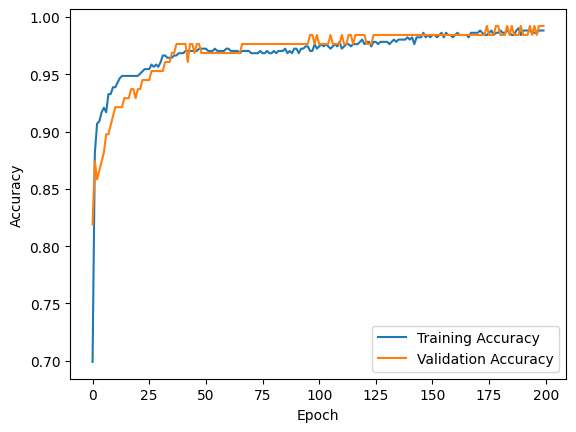

In [46]:
# Visualize training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

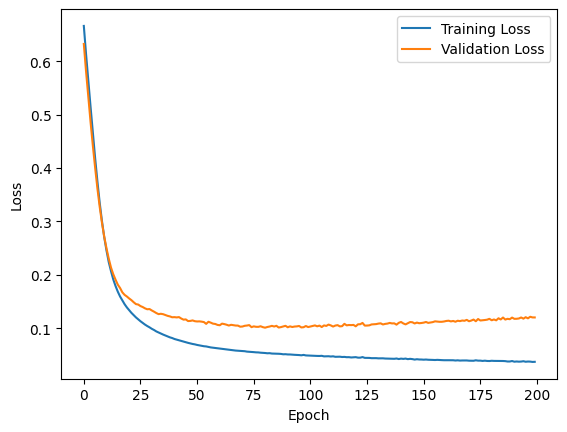

In [47]:
# Visualize training history including loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [48]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Threshold the predictions for binary classification
binary_predictions = (predictions > 0.5).astype(int)

# Evaluate the model
accuracy = np.sum(binary_predictions.flatten() == y_test) / len(y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

4/4 [==============================] - 1s 4ms/step
Test Accuracy: 99.21%
